In [100]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [172]:
beta = 10.
U = 4.
t = 1.
N = 71 # odd
n = N+1
freq = np.pi/beta * np.arange(-N, N+2, 2) 
def disp(k):
    return -2.*t*np.cos(k)
Nk = 100

In [173]:
def Sigma(w,prop):
    return - U*U/beta/beta*sum( prop(nu)* sum( prop(w-nu+q)*prop(q) for q in freq) for nu in freq) 

def Gloc(w,selfen):
    return 1./Nk*sum( 1./( 1j*w - disp(k) - selfen ) for k in np.arange(-np.pi,np.pi,1./Nk) )

def Gnew(w,Gold):
    sigma = Sigma(w,Gold)
    gloc = Gloc(w,sigma)
    return 1./ ( 1./gloc + U/2. + sigma )

In [174]:
def gupdate(index,g):
    sigma = - U*U/beta/beta*sum( g[nu]* sum( g[ max( min(index-nu+q,n-1), 0) ]*g[q] for q in range(n) ) for nu in range(n) )
    gloc = 1./Nk*sum( 1./( 1j*freq[index] - disp(k) - sigma ) for k in np.arange(-np.pi,np.pi,1./Nk) )
    if(index == n/2): print abs(1./gloc), abs(sigma)
    return 1./ ( 1./gloc + U/2. + sigma )

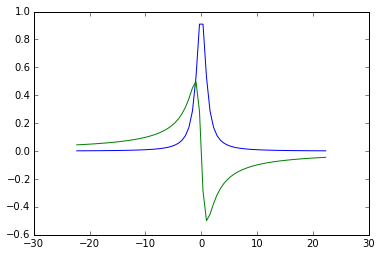

In [175]:
a = 1.
def G0(w):
    return 1. / ( 1j*w + a )
g0 = map(G0,freq)
plt.plot(freq,map(lambda ind: g0[ind].real, range(n)))
plt.plot(freq,map(lambda ind: g0[ind].imag, range(n)))

0.321655076352 0.117987226528
2.65918208326 16.847295137
0.320835178159 0.185502957029
2.32736457827 14.7766200348
0.31903863825 0.28567458007


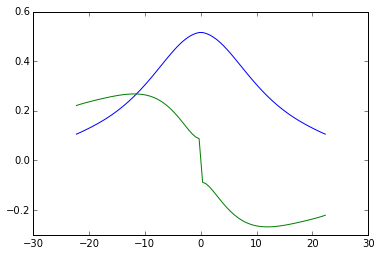

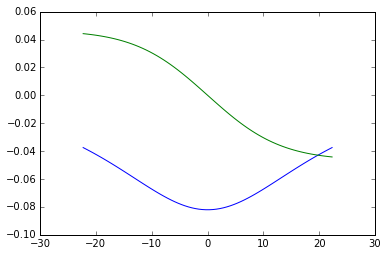

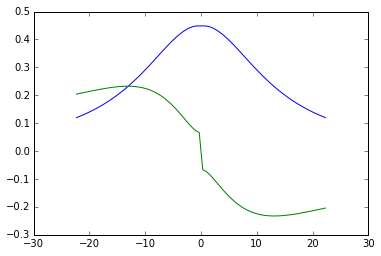

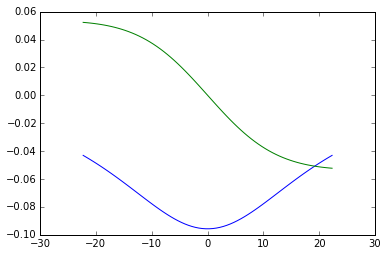

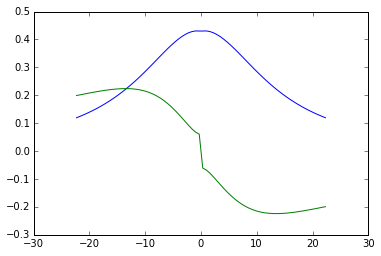

In [176]:
Iter = 5
gcur = g0
for i in range(Iter):
    gnew = map(lambda ind: gupdate(ind,gcur), range(n) )
    gcur = gnew
    plt.figure()
    plt.plot(freq,map(lambda ind: gnew[ind].real, range(n)))
    plt.plot(freq,map(lambda ind: gnew[ind].imag, range(n)))